<a href="https://colab.research.google.com/github/KeonHee0513/test/blob/main/tensorflow2_0_dnn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# boostcourse_tensorflow2.0_dnn_project

### 실습 전 안내
* 실습코드는 <font color='red'>Python 3.6</font>, <font color='red'>TensorFlow 2.0</font>버전을 기준으로 작성되었습니다. 원활한 실습 진행을 위해 버전을 맞춰주시는 것을 권장드립니다.
* 간혹 컴퓨터 성능에 따라 모델을 학습시키는 과정에서 시간이 소요될 수 있습니다. 이 경우 <font color='red'>Colab</font>으로 실습을 진행해주시는 것을 권장드립니다.

## Colab 사용자를 위한 안내

해당 노트북은 **로컬** 환경에서 최적화 되어 있습니다. **로컬 환경에서 진행하시는 분**들은 바로 학습을 진행하시면 됩니다.

**Colab을 사용하시는 분**들은 처음에 아래 주석을 해제하시고 한번 만 실행시켜주세요!

* 주석을 해제하는 방법: 해당 영역을 선택하고, `Ctrl + /` 를 누르면 해당 영역의 주석에 해제됩니다.

In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


Colab 을 사용하시는 분들은 아래 주석을 해제하시고 `folder` 변수 명에 프로젝트 디렉토리를 저장한 위치를 작성해주세요! 예를 들어, `01_dnn_tf` 의 위치가 "내 드라이브 > colab_notebook > tensorflow" 폴더 안에 있는 경우, "colab_notebook/tensorflow" 를 작성하시면 됩니다.

```python
folder = "colab_notebook/tensorflow"
```

In [2]:
import os
from pathlib import Path

# folder 변수에 구글드라이브에 프로젝트를 저장한 디렉토리를 입력하세요!
# My Drive 밑에 저장했다면 그대로 두시면 됩니다.
folder = ""
project_dir = "01_dnn_tf"

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/My Drive/01_dnn_tf


# Neural Network: FashoinMNIST Classifier

![](https://drive.google.com/uc?id=1OSa44ql8zf9kq2r_D_Q0U1WWTkMPcCgm)

* 이미지 출처: 네이버
<br>
스마트 렌즈는 여러분이 찍은 이미지가 어떤 옷인지 판별하고 쇼핑과 연결지어 검색까지 해줍니다. 이러한 기술은 어떻게 만들어 지는 것일까요? 물론 복잡한 기술이 들어가겠지만 여기에는 딥러닝 기술이 포함되어 있습니다. 이번 프로젝트에서는 10 종류의 의류와 관련된 이미지를 학습시키고 판별하는 모델을 만들어 볼것입니다.     

이번 실습의 목표는 다음과 같습니다.
- [Fashion-Mnist](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 활용해 분류기를 학습한다.
- Multi layer perceptron, Batch normalization, ReLU 를 활용해 네트워크를 설계한다.

이번 과정을 통해 여러분은 TensorFlow 를 이용해 분류기를 학습시키고, 학습된 모델의 성능을 검사하는 절차를 익힐 수 있습니다. 전체적인 과정은 다음과 같습니다.

- 우리가 다뤄야 할 데이터는 28x28x1 (이미지 높이x이미지 너비x채널)의 흑백 이미지입니다. 즉, 밝기값만을 가지고 있습니다.
- 생활속에서 주로 접하게되는 컬러 이미지의 경우 빛의 3원색인 Red, Green, Blue의 3채널로 구성되어 있습니다. 일반적으로 이 3채널을 RGB채널이라고 부르며, 이 채널 값들의 조합으로 색상을 표현하게 됩니다.
- DNN(Deep Neural Network)의 입력으로 사용되기 위해서 28$\times$28$\times$1의 3차원은 784의 1차원 데이터로(28\*28\*1=784) 변환됩니다. 
- 784차원의 입력 데이터는 DNN을 통과하여 10차원의 의류 종류를 나타내는 출력으로 변환 됩니다(아래의 그림을 참고해 주세요).
- 여러분이 만들어야 하는 것은 이 DNN 구조를 TensorFlow를 이용하여 설계하는 과정입니다.
<br>
<img src="https://drive.google.com/uc?id=1N691obHfLeKvP7eJ842EkMovK0O_Nu5E" width="60%" height="60%">
<caption><center>&lt;28$\times$28$\times$1의 이미지를 입력으로 받아 옷의 종류를 반환하는 DNN&gt;</center></caption>

### 이제부터 본격적으로 프로젝트를 시작하겠습니다.

**"[TODO] 코드 구현"** 부분의 **"##코드 시작##"** 부터 **"##코드 종료##"** 구간에 필요한 코드를 작성해주세요. **나머지 작성구간이 명시 되지 않은 구간은 임의로 수정하지 마세요!**


**본문 중간중간에 TensorFlow 함수들에 대해 [TensorFlow API 문서](https://www.tensorflow.org/api_docs/python/tf) 링크를 걸어두었습니다. API 문서를 직접 확인하는 일에 익숙해지면 나중에 여러분이 처음부터 모델을 직접 구현해야 할 때 정말 큰 도움이 됩니다.**

<h1>목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Colab-사용자를-위한-안내" data-toc-modified-id="Colab-사용자를-위한-안내-1">Colab 사용자를 위한 안내</a></span></li><li><span><a href="#Neural-Network:-FashoinMNIST-Classifier" data-toc-modified-id="Neural-Network:-FashoinMNIST-Classifier-2">Neural Network: FashoinMNIST Classifier</a></span><ul class="toc-item"><li><span><a href="#1.-Package-load" data-toc-modified-id="1.-Package-load-2.1">1. Package load</a></span></li><li><span><a href="#2.-하이퍼파라미터-세팅" data-toc-modified-id="2.-하이퍼파라미터-세팅-2.2">2. 하이퍼파라미터 세팅</a></span></li><li><span><a href="#3.-Dataset-load-및-tf.data.Dataset-구축" data-toc-modified-id="3.-Dataset-load-및-tf.data.Dataset-구축-2.3">3. Dataset load 및 <code>tf.data.Dataset</code> 구축</a></span></li><li><span><a href="#4.-데이터-샘플-시각화" data-toc-modified-id="4.-데이터-샘플-시각화-2.4">4. 데이터 샘플 시각화</a></span></li><li><span><a href="#5.-모델-(네트워크)-만들기" data-toc-modified-id="5.-모델-(네트워크)-만들기-2.5">5. 모델 (네트워크) 만들기</a></span></li><li><span><a href="#6.-Loss-function-및-Optimizer-정의" data-toc-modified-id="6.-Loss-function-및-Optimizer-정의-2.6">6. Loss function 및 Optimizer 정의</a></span></li><li><span><a href="#7.-Training" data-toc-modified-id="7.-Training-2.7">7. Training</a></span></li><li><span><a href="#8.-Evaluate-on-test-dataset" data-toc-modified-id="8.-Evaluate-on-test-dataset-2.8">8. Evaluate on test dataset</a></span></li><li><span><a href="#9.-Summary" data-toc-modified-id="9.-Summary-2.9">9. Summary</a></span></li></ul></li><li><span><a href="#Self-Review" data-toc-modified-id="Self-Review-3">Self-Review</a></span></li></ul></div>

## 1. Package load

먼저, 필요한 패키지들을 로드합니다.
주로 사용될 대표적인 패키지들의 사용목적은 다음과 같습니다.

- `numpy`: Scientific computing과 관련된 여러 편리한 기능들을 제공해주는 라이브러리입니다.
- `matplotlib.pyplot`: 데이터 시각화를 위해 사용합니다.
- `tensorflow`: TensorFlow 를 로드합니다.
- `tensorflow.keras.layers`: 모델의 각 Layer들을 만들기 위해 사용합니다.

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import check_util.checker as checker 
from IPython.display import clear_output

import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))

tensorflow version: 2.4.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU 사용 가능 여부: True


## 2. 하이퍼파라미터 세팅

학습에 필요한 하이퍼파라미터의 값을 초기화해줍니다. 하이퍼파라미터는 뉴럴네트워크를 통하여 학습되는 것이 아니라 학습율(learning rate), 사용할 레이어의 수 등 설계자가 결정해줘야 하는 값들을 의미합니다.

미니배치의 크기(`batch_size`), 학습 할 epoch 수(`max_epochs`), 학습률(`learning_rate`) 등의 값들을 다음과 같이 정했습니다.

In [4]:
batch_size = 128
max_epochs = 5
learning_rate = 0.001
num_classes = 10

## 3. Dataset load 및 `tf.data.Dataset` 구축

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)는 10개의 필기체 숫자로 구성된 [MNIST 데이터](http://yann.lecun.com/exdb/mnist/)의 Fashion 버젼(version)으로 보시면 됩니다. 프로그래밍을 처음 접해보는 사람들이 주로 가장 먼저 실습해 보는 것이 "Hello, World"를 출력해보는 것이죠. 머신러닝을 처음 접해보시는 분들에게 이 "Hello, Wolrd"를 출력해보는 작업이 MNIST 데이터를 분류해보는 것이라고 비유할 수 있을 것 같습니다. 그만큼 많은 사람들이 쉽게 다운로드 받아 테스트 해볼 수 있고, 분류기들의 성능 비교용으로도 많이 사용됩니다.<br>
그러나 현재 MNIST 분류는 머신러닝 기술의 발전하면서 너무 쉬운 문제가 됐고, MNIST에서 좋은 성능을 보이는 분류기가 다른 데이터에서도 잘 작동한다고 말하기 어려운 환경이 됐습니다. 그에대한 한가지 대안으로 제시된 데이터가 Fashion-MNIST 입니다. <br>
Fashion-MNIST는 MNIST와 동일한 크기의 데이터(10개의 부류, 60,000개의 학습, 10,000개의 테스트 데이터)이지만 MNIST보다 분류하기 어려운 의류 영상데이터 입니다. Fashion-MNIST의 데이터 부류는 T-Shirts, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Bag, Ankle boot로 10개의 입니다. 

실습을 위해 Fashion-MNIST 데이터셋을 정의해주고, 전체 데이터셋을 미니배치 단위로 뉴럴넷에 공급해주도록 `tf.data.Dataset`을 정의합니다.

### Fashion-MNIST 데이터셋 load

* [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터는 `tf.keras.datasets`에서 기본 제공됩니다.
* 아래 코드블록의 5번째 줄은 `train_data`의 값의 범위인 [0, 255]의 범위를 [0, 1]의 범위로 조절 합니다.
* 6번째 줄은 이미지 형태의 (28(높이), 28(너비)) 데이터를 네트워크의 입력으로 넣기 위해 1차원의 28*28=784 데이터로 변경합니다.
* 10번째 줄부터 `train_data`를 변환한 방식으로 `test_data`를 변환합니다.

In [5]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape([-1, 28 * 28])
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape([-1, 28 * 28])
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)

4423680/4422102 [==============================] - 0s 0us/step


### <font color='red'>[TODO] 코드 구현</font>

다음을 읽고 코드를 완성해보세요. 단, "## 코드 시작 ##"과 "## 코드 종료 ##" 사이에 주어진 변수 명으로 코드를 작성하세요!

`tf.data.Dataset`을 이용하여 input pipeline 구축하여 봅시다.

TensorFlow의 tf.data API는 네트워크 입력을 만들기 위한 복잡한 데이터 처리과정을 단순화 시켜줍니다.
본 실습에서는 데이터 입력 파이프라인을 쉽게 설계할 수 있는 tf.data.Dataset을 이용할 겁니다.
실습에 사용될 tf.data.Dataset 내에서 사용할 API들은 다음과 같습니다.

* `tf.data.Dataset`에 대한 자세한 설명은 [Importing Data](https://www.tensorflow.org/guide/datasets) 페이지 참고 바랍니다.
* `tf.data.Dataset`의 다양한 method들은 [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) 페이지에서 살펴보시면 좋습니다.
<br>
<br>
* `tf.data.Dataset.from_tensor_slices`: numpy타입의 데이터를 tf.data.Dataset 형태의 데이터로 변환시켜줍니다.
* `tf.data.Dataset.shuffle`: 데이터를 무작위로 섞어 줍니다.
  * `shuffle`함수의 매개변수로 `buffer_size`가 있습니다. 이는 버퍼를 `buffer_size` 크기의 요소(elements)로 채운 다음 이 버퍼에서 무작위로 샘플링하고 선택된 요소를 새로운 요소로 대체합니다. 완벽한 섞임을 위해서는 데이터 세트의 전체 크기보다 크거나 같은 버퍼 크기(`buffer_size`)가 필요합니다.
* `tf.data.Dataset.batch`: 읽어들일 데이터의 배치크기(batch_size)를 결정합니다.
* [`repeat`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat)를 이용하여 재사용할 수 있게 만들어봅시다.


**tf.data.Dataset API를 이용하여 다음과 같은 작업을 수행해야 합니다**
* [`tf.data.Dataset.from_tensor_slices`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices) API를 이용하여 train_data 및 train_labels데이터를 `tf.data.Dataset` 형태로 만들어봅시다. 마찬가지로 test_data, test_labels데이터도 `tf.data.Dataset` 형태로 만들어봅니다. 이미지 한장에 해당하는 부류 레이블이 한 세트로 묶어져야 합니다.
* `tf.data.Dataset.shuffle`: 데이터셋을 shuffle 시켜줍니다.
* `tf.data.Dataset.batch`: 데이터셋의 batch_size를 결정합니다.
* `tf.data.Dataset.repeat`: 데이터셋을 다 사용하더라도 반복해서 사용할 수 있게합니다. 값을 지정하지 않으면 무한히 반복할 수 있습니다.

**아래의 코드블록은 tf.data.Dataset을 만드는 간단한 에제와 데이터 추출과정을 보여줍니다.**

In [6]:
# tf.data.Dataset 만드는 간단한 예제
temp_dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4])
temp_dataset = temp_dataset.shuffle(100)
temp_dataset = temp_dataset.batch(2)
temp_dataset = temp_dataset.repeat(3)

In [7]:
# 실제 data를 추출하는 과정
for epoch in range(3):
    count = 0 # 무한루프 방지용
    for step, data in enumerate(temp_dataset):
        print("epoch: {}  step: {}  data: {}".format(
              epoch+1, step+1, data))
        count += 1
        if count > 10:
            break

epoch: 1  step: 1  data: [3 4]
epoch: 1  step: 2  data: [1 2]
epoch: 1  step: 3  data: [4 1]
epoch: 1  step: 4  data: [3 2]
epoch: 1  step: 5  data: [3 4]
epoch: 1  step: 6  data: [2 1]
epoch: 2  step: 1  data: [4 2]
epoch: 2  step: 2  data: [3 1]
epoch: 2  step: 3  data: [4 3]
epoch: 2  step: 4  data: [2 1]
epoch: 2  step: 5  data: [1 3]
epoch: 2  step: 6  data: [2 4]
epoch: 3  step: 1  data: [1 4]
epoch: 3  step: 2  data: [2 3]
epoch: 3  step: 3  data: [3 1]
epoch: 3  step: 4  data: [4 2]
epoch: 3  step: 5  data: [1 4]
epoch: 3  step: 6  data: [3 2]


`test`데이터 셋은 shuffle할 필요가 없습니다. 
* `train`시 shuffle하는 목적은 mini-batch gradient descent를 하기 위해 mini-batch 데이터를 random 하게 뽑는 것입니다. 
* `test` 데이터 셋의 목적은 성능을 평가하기 위함입니다. 그렇기 때문에 `test`데이터 셋은 shuffle할 필요가 없습니다.

**이제 모델에게 전달할 데이터 공급 코드를 작성해보세요! "<font color='45A07A'>## 코드 시작 ##</font>"과 "<font color='45A07A'>## 코드 종료 ##</font>" 사이의 <font color='075D37'>None</font> 부분을 채우시면 됩니다.**

In [8]:
# for train
N = len(train_data)

## 코드 시작 ##
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(100)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat(3)
## 코드 종료 ##

print(train_dataset)

# for test
## 코드 시작 ##
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.repeat(3)
## 코드 종료 ##

print(test_dataset)

<RepeatDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int32)>
<RepeatDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int32)>


`print(train_dataset)` 및 `print(test_dataset)`의 결과는 다음과 같습니다.

```
<RepeatDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int32)>
<RepeatDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int32)>
```

아래의 코드를 실행해 코드를 성공적으로 완성했는지 확인해보세요. 

별다른 문제가 없다면 이어서 진행하면 됩니다.

In [9]:
checker.train_dataset_check(train_dataset)
checker.test_dataset_check(test_dataset)

train_dataset을 잘 구현하셨습니다! 이어서 진행하셔도 좋습니다.
test_dataset을 잘 구현하셨습니다! 이어서 진행하셔도 좋습니다.


## 4. 데이터 샘플 시각화

FashionMNIST는 MNIST와 마찬기지로 총 10개의 클래스로 구성되어 있으며 티셔츠, 바지 등 패션과 관련된 아이템들을 28 $\times$ 28 크기의 흑백 이미지로 구성한 데이터셋입니다.

아래의 코드블록은 Fashion-MNIST 데이터를 시각화 합니다.

`labels_map`에 각 클래스의 이름과 인덱스를 파이썬 딕셔너리(dictionary)로 저장했습니다. 
7번재 줄부터 for문을 이용하여 `train_data`에 속한 데이터를 무작위로 25개 추출한 뒤 5$\times$5 격자 형태로 출력합니다.

`matplotlib`은 2D 시각화를 위한 라이브러리입니다. `matplotlib.pyplot`의 figure()를 통해 그림을 그릴 도화지를 생성할 수 있습니다. 생성된 figure 객체의 `add_subplot` 함수를 통해 전체 도화지 속에 일부 도면을 삽입할 수 있습니다. 큰 도화지 위에 작은 그림들을 구역마다 그리는 것입니다. 코드를 실행해 생성된 그림을 먼저 보시고 코드를 함께 보면 더욱 이해하기 쉬울 것입니다.
`matplotlib.pyplot`의 더 다양한 기능을 살펴보고 싶으면 [이곳](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html)을 참고해주세요. 

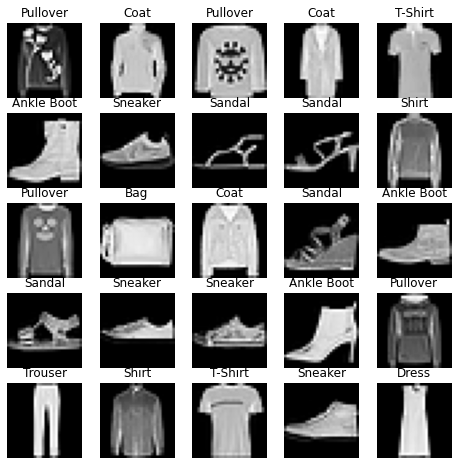

In [10]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx].reshape([28, 28])
    label = labels_map[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

## 5. 모델 (네트워크) 만들기

학습시킬 뉴럴네트워크를 설계합니다. 
이번 실습에서는 Multi Layer Perceptron(MLP) 레이어를 2개 쌓아 네트워크를 설계할 것입니다.

MLP는 아래의 그림과 같이 한 레이어의 모든 뉴런이 다음 레이어의 뉴런과 완전히 연결된 계층(Fully connected layer 또는 Dense layer)입니다. 

<img src="https://drive.google.com/uc?id=1KuQg548RFXMm1Kih46IXkKLO-q76lBdQ" width="800px" height="400px" />


한편, MLP의 레이어를 깊게 쌓을 때에는 반드시 비선형 activation function이 필요합니다.
이번 실습에서는 ReLU를 사용 할 것입니다. 
ReLU는 아래의 그림과 같이 음수의 입력에 대해서는 0, 양수의 입력에 대해서는 입력값을 그대로 출력하는 함수입니다.

<img src="https://drive.google.com/uc?id=14hYX4UF0Ony8apMZmN7IEkQHqP6PB-ne" width="400px" height="400px" /><caption><center>ReLU의 출력</center></caption>

### <font color='red'>[TODO] 코드 구현</font>

다음을 읽고 코드를 완성해보세요.

- 첫번째 dense layer의 입력 feature 갯수는 입력 이미지의 픽셀 갯수인 28 $\times$ 28로, 출력 feature 갯수는 512로 하겠습니다.
- 첫번째 dense layer와 ReLU 사이에 Batch normalization(['Lab-10-4'](https://www.youtube.com/watch?v=-VwtLBp2FRs&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C&index=30))을 적용해보세요.
- 그리고 첫번째 dense layer 이후에는 ReLU 함수를 적용해보세요.
- 두번째 dense layer의 출력 feature 갯수는 데이터의 class 갯수인 10으로 지정해야 합니다. (혹은 `2. 하이퍼파라미터 세팅`장에서 정의한 `num_classes` 로 지정합니다.)
- 두번째 dense layer 이후에는 ReLU activation function을 적용하지 않습니다. Classification 네트워크의 마지막 activation function은 주로 softmax 함수가 적용되기 때문입니다. dense layer에 parameter로 activation을 지정해보세요.

- 실습에 사용 될 **tf.keras.layers API** (**자세한 사용법은 레이어명 클릭**)
  - [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) : 일반적인 완전연결(densely-connected) 레이어
  - [`BatchNormalization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) : 배치 노말라이제이션 레이어
  - [`ReLU`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU) : ReLU 활성화 함수 레이어

### [`tf.keras.Sequential()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential)을 이용하여 모델 만들기

* `tf.keras.model.Sequential()`와 `tf.keras.Sequential()`은 같은 API
* `Sequential`은 해당 레이어의 output이 그대로 다음 레이어의 input이 되는 구조의 모델을 만들 때 씁니다.

### <font color='blue'> [Tensorflow 1.x 버전과 2.x 버전의 차이점] </font>

- Tensorflow 1.x 버전과 2.x 버전의 가장 큰 차이점은 eager모드가 default로 변경되었다는 점입니다. 이전의 tensorflow에서는 계산 그래프를 지정해준 다음 session을 열어서 계산을 수행하는 방법을 이용했습니다. 2.x 버전으로 바뀌면서 eager 모드가 default가 되었고 keras의 high-level api가 표준 api로 정해졌습니다. 
- 앞으로 수행할 프로젝트에서는 tf.keras 기반의 sequential 구조를 사용합니다. sequential 구조는 레고 쌓기 비유가 자주 사용됩니다. layer들을 하나씩 하나씩 add 하면서 전체 model을 완성하면 되기 때문입니다. 편하고 간결한 코드 때문에 단순한 모델에서 큰 장점이 있지만 복잡한 모델에서는 class 형식으로 model을 구성합니다.

In [11]:
model = tf.keras.Sequential() # Sequential 모델 생성

**tf.keras.layers API 를 이용해 모델 코드를 작성해보세요! "<font color='45A07A'>## 코드 시작 ##</font>"과 "<font color='45A07A'>## 코드 종료 ##</font>" 사이의 <font color='075D37'>None</font> 부분을 채우시면 됩니다.**

In [30]:
## 코드 시작 ##
model.add(layers.Dense(512, input_shape=(784, )))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dense(units=num_classes, activation='softmax'))
## 코드 종료 ##

아래의 코드를 실행해 코드를 성공적으로 완성했는지 확인해보세요. 

별다른 문제가 없다면 이어서 진행하면 됩니다.

In [31]:
checker.model_check(model)

지문의 지시보다 더 많거나 적은 dense layer가 설계되었습니다. 지문을 다시 확인하시기 바랍니다.
지문의 지시보다 더 많거나 적은 Bach normalization layer가 설계되었습니다. 지문을 다시 확인하시기 바랍니다.
지문의 지시보다 더 많거나 적은 ReLU 함수가 설계되었습니다. 지문을 다시 확인하시기 바랍니다.
두번째 dense layer의 출력 feature 수가 잘못되었습니다. 지문을 다시 확인하시기 바랍니다.


### <font color='blue'> [잠깐! 퀴즈 한 번 풀어볼까요?] </font>

***퀴즈 #1:*** 첫번째 MLP 레이어에서 학습되는 파라미터의 개수는?

***정답 #1:*** (weight 개수 + bias 개수) = (784 x 512 + 512) = 401408 + 512 = 401920

모델의 학습 파라미터 개수는 왜 중요할까요? 학습할 파라미터 개수가 많아진다는 것은 무엇을 의미할까요? 학습할 파라미터가 많다는 것은 모델이 더욱 복잡한 함수를 표현할 수 있게 됨을 의미합니다. 따라서 학습할 파라미터가 많으면 모델이 더 복잡한 문제를 풀 수 있는 능력을 갖추게 되는 것입니다. 하지만 모델의 학습 파라미터가 많아지면 학습에 필요한 데이터 개수 또한 증가하게 됩니다. 예를 들어 $x= 1, y=2$ 인 데이터가 있을 때, $y = w_1 x$ (학습 파라미터가 1개인 모델) 와 $y= w_1 x + w_2$ (학습 파라미터가 2개인 모델)의 매개변수 값을 각각 구한다고 가정해보겠습니다. 첫번째 식은 $2=w_1 \times 1$ 로 해(solution)가 구해지지만 두번째 식은 하나의 데이터로는 두 개의 파라미터의 해를 구할 수 없겠죠.

***퀴즈 #2 :*** Xavier normal initialization은 표준편차가 **X**인 정규분포로 weight를 초기화하는 방법입니다. 다음 중 **X**에 들어갈 값으로 올바른 것은? (단, $n_{in}$과 $n_{out}$은 각각 입력, 출력 뉴런의 갯수)

① $\sqrt{\frac{2}{n_{in} + n_{out}}}$
② $\sqrt{\frac{n_{in} + n_{out}}{2}}$
③ $\sqrt{\frac{2}{n_{in}}}$
④ $\sqrt{\frac{n_{in}}{2}}$

***정답 :*** ①

### 데이터의 일부를 넣어서 model 체크 & summary 하기

모델을 학습 하기전에 모델이 잘 동작하는지 확인해 보겠습니다. 아래의 코드블록은 배치크기만큼 영상을 가져온 후 이 중 3개를 영상을 모델에 입력해 보는 코드입니다. 그리고 `model.summary()`를 통해 생성된 모댈의 정보를 확인하실 수 있을 겁니다.

In [38]:
for images, labels in train_dataset.take(1):
    print("predictions: ", model(images[0:3]))

predictions:  tf.Tensor(
[[0.09980895 0.1013564  0.10033885 0.09998333 0.10277842 0.10088184
  0.09830382 0.09843183 0.09762391 0.10049265]
 [0.09980895 0.10135641 0.10033885 0.09998333 0.10277844 0.10088186
  0.09830385 0.09843182 0.09762388 0.10049263]
 [0.09980895 0.1013564  0.10033883 0.0999833  0.10277846 0.10088186
  0.09830383 0.09843183 0.09762388 0.10049263]], shape=(3, 10), dtype=float32)


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1

## 6. Loss function 및 Optimizer 정의

생성한 모델을 학습 시키기 위해서 손실함수를 정의해야 합니다. 뉴럴네트워크는 경사하강(gradient descent)방법을 이용하여 손실함수의 값을 줄이는 방향으로 파라미터를 갱신(update) 하게 됩니다. 또한 효과적인 경사하강 방법을 적용하기 위해 옵티마이져를 함께 사용할 겁니다.

### <font color='red'>[TODO] 코드 구현</font>

다음을 읽고 코드를 완성해보세요.
- `compile` 앞서 정의한 model에서 training을 위해 loss와 optimizer를 지정해주세요. [tf.Keras.Model.compile()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)
- `loss` [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)와 [Cross Entropy Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)의 차이점을 읽고 데이터에 맞는 loss를 정의하세요.
- `optimizer` 변수에 [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)를 앞에서 지정한 learning rate에 맞게 정의하세요.
- `metrics` accuracy를 정의하세요.

### <font color='blue'> [Tensorflow 1.x 버전과 2.x 버전의 차이점] </font>

- `loss`, `optimizer`, `metric` 등을 `model.compile`을 통해 한꺼번에 쉽고 가독성 있게 설정할 수 있게 되었습니다. 

**이제 손실함수와 옵티마이저 코드를 작성해보세요! "<font color='45A07A'>## 코드 시작 ##</font>"과 "<font color='45A07A'>## 코드 종료 ##</font>" 사이의 <font color='075D37'>None</font> 부분을 채우시면 됩니다.**

In [40]:
# model compile with optimizer, loss, metrics

## 코드 시작 ##
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
## 코드 종료 ##

아래의 코드를 실행해 코드를 성공적으로 완성했는지 확인해보세요.

별다른 문제가 없다면 이어서 진행하면 됩니다.

In [41]:
checker.compile_check(model)

metric을 확인해주세요.


## 7. Training

이제 모델에 데이터를 미니배치 단위로 제공해서 학습을 시킬 단계입니다. 

### <font color='red'>[TODO] 코드 구현</font>

다음을 읽고 코드를 완성해보세요. 단, "# 코드 시작"과 "# 코드 종료" 사이에 주어진 변수 명으로 코드를 작성하세요!
- [`tf.keras.Model의 Method인 fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)을 이용하여 학습을 시작하세요.
- `tf.data.Dataset`으로 만든 객체인 `train_dataset`을 input으로 넣어주세요.
- input으로 tf.data를 이용하는 경우 `steps_per_epoch` 을 지정해주어야 합니다. train_data의 길이를 batch_size 크기로 나눈 값을 지정해주세요.
- `epochs`를 미리 변수에 담아둔 값으로 지정해주세요.

**이제 각 스텝에 따라 훈련 단계 코드를 작성해보세요! "<font color='45A07A'>## 코드 시작 ##</font>"과 "<font color='45A07A'>## 코드 종료 ##</font>" 사이의 <font color='075D37'>None</font> 부분을 채우시면 됩니다.**

In [42]:
## 코드 시작 ##
model.fit(train_dataset, epochs=epoch)
## 코드 종료 ##

Epoch 1/2
1407/1407 [==============================] - 9s 5ms/step - loss: 0.6201 - accuracy: 0.7867
Epoch 2/2
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3666 - accuracy: 0.8695


위의 로그에 출력되는 마지막 학습 Accuracy가 90% 전후로 나오면 코드를 잘 완성한 것입니다.

만약에 학습이 진행이 되지 않는다면 지문과 지문에 나와있는 API문서 링크를 다시 한 번 꼼꼼히 살펴보시기 바랍니다.

문제가 없다면 다음으로 이어서 진행하시면 됩니다.

In [43]:
checker.accuracy_check(model)

Model Accuracy가 낮습니다. 하이퍼파라미터 숫자를 조절해보세요.


## 8. Evaluate on test dataset

마지막으로 학습된 모델의 성능을 테스트할 차례입니다.

tf.keras.Model의 하위 method인 [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)을 이용하면 쉽게 확인할 수 있습니다.

In [44]:
loss,accuracy = model.evaluate(test_dataset, steps = len(test_data)//batch_size)
print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(accuracy))

78/78 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.8389
test loss is 0.44066277146339417
test accuracy is 0.838942289352417


최종 성능이 대략 85% 전후로 나오면 학습이 잘된 것으로 볼 수 있습니다.

In [45]:
checker.test_check(model)

Test Accuracy가 낮습니다. Model의 구조와 Data Input, Output을 확인해주세.


### output 확인하기
Accuracy같은 모델의 성능이 아닌 실제로 output이 어떻게 나오는지 확인하려면 두 가지 방법이 있습니다.

`predict`를 이용하는 방법이 있고 model에 `input을 직접 넣는 방법`이 있습니다.

> `model.predict(tf.reshape(images[0], (1,-1)))` 

> `model(tf.reshape(images[0], (1,-1)), training=False)`

- reshape을 해주는 이유는 model이 input으로 받는 shape이 `(batch_size, input_shape)` 형식이기 때문입니다. 

- 모델에 `training` argument를 `False`로 주는 이유는 다음과 같습니다. `Batch normalization`, `dropout`과 같은 layer들은 training을 할 때와 test를 할 때 작동하는 방식이 다르기 때문입니다. 그래서 현재 `mode`가 `training`중인지 아닌지를 argument로 넘겨주는 것입니다.

- inference시에 `training` parameter의 default값은 False입니다. True로 바꾸면 어떻게 값이 변하는지 확인해보세요.

In [46]:
model.predict(tf.reshape(images[0], (1,-1)))

array([[7.46145427e-01, 1.05619176e-04, 1.70800257e-02, 1.53486570e-03,
        4.00614401e-04, 6.57107856e-04, 2.33340740e-01, 1.07589392e-06,
        7.19822827e-04, 1.47456612e-05]], dtype=float32)

In [47]:
model(tf.reshape(images[0], (1,-1)), training = False)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[7.46145427e-01, 1.05619176e-04, 1.70800257e-02, 1.53486570e-03,
        4.00614401e-04, 6.57107856e-04, 2.33340740e-01, 1.07589392e-06,
        7.19822827e-04, 1.47456612e-05]], dtype=float32)>

In [48]:
model(tf.reshape(images[0], (1,-1)))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[7.46145427e-01, 1.05619176e-04, 1.70800257e-02, 1.53486570e-03,
        4.00614401e-04, 6.57107856e-04, 2.33340740e-01, 1.07589392e-06,
        7.19822827e-04, 1.47456612e-05]], dtype=float32)>

In [49]:
model(tf.reshape(images[0], (1,-1)), training = True)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.10298438, 0.09066427, 0.11081529, 0.11021463, 0.11750751,
        0.08613798, 0.11244107, 0.0790597 , 0.11276817, 0.07740709]],
      dtype=float32)>

학습된 모델의 예측 결과를 시각화하면 다음과 같습니다. label이 <font color='blue'>파란색</font>으로 표시되면 모델이 정확한 예측을 한 것이고 <font color='red'>빨간색</font>으로 표시되면 틀린 예측을 한 것입니다. 틀린 경우에는 모델의 예측과 함께 실제 정답을 표기해두었습니다. (ex. 오답/정답)

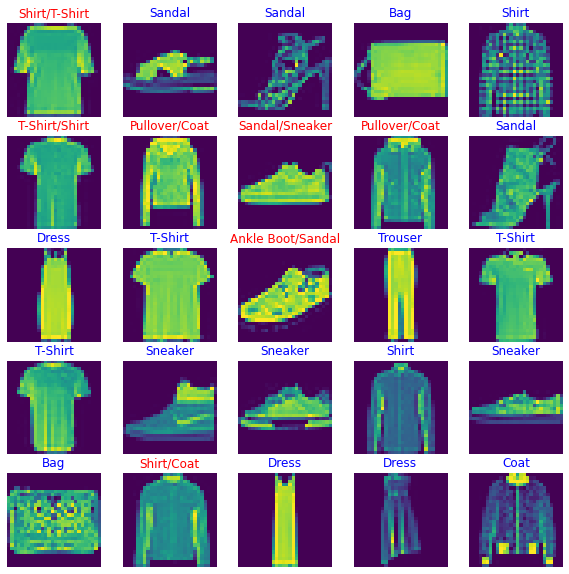

In [50]:
test_batch_size = 25
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28))
    p.axis('off')

## 9. Summary

여기까지 오신 여러분 잘하셨습니다! 

우리는 이번 실습을 통해 다음과 같은 내용을 학습했습니다.

- Multi layer perceptron을 설계할 수 있다.
- 네트워크에 ReLU, Batch normalization를 적용할 수 있다.
- `tf.data.Dataset`을 이용하여 데이터입력 파이프라인(input pipeline)을 만들 수 있다.
- 손실함수(loss function)과 옵티마이져(optimizer)를 정의할 수 있다.
- 손실(loss)를 측정하고 경사(gradient)를 계산해 모델 파라미터를 업데이트할 수 있다.
- 학습한 모델의 성능을 테스트 할 수 있다.

# Self-Review

학습 환경에 맞춰 알맞는 제출방법을 실행하세요!

### 로컬 환경 실행자

1. 모든 실습 완료 후, Jupyter Notebook 을 `Ctrl+S` 혹은 `File > Save and checkpoint`로 저장합니다.
2. 제일 하단의 코드를 실행합니다. 주의할 점은 Jupyter Notebook 의 파일이름을 수정하시면 안됩니다! 만약에 노트북 이름을 수정했다면 "tensorflow-dnn-project" 로 바꿔주시길 바랍니다. 모든 평가 기준을 통과하면, 함수 실행 후 프로젝트 "submit" 디렉토리와 압축된 "submit.zip"이 생깁니다. "dnn_submission.tsv" 파일을 열고 모두 Pass 했는지 확인해보세요!
    * "dnn_submission.tsv" : 평가 기준표에 근거해 각 세부항목의 통과여부(Pass/Fail) 파일
    * "dnn_submission.html" : 여러분이 작성한 Jupyter Notebook 을 html 형식으로 전환한 파일
3. 코드 실행결과 안내에 따라서 `submit.zip` 파일을 확인하시고 제출해주시길 바랍니다.

### Colab 환경 실행자

1. 모든 실습 완료 후, Jupyter Notebook 을 `Ctrl+S` 로 저장합니다.
2. 제일 하단의 코드를 실행합니다. 코드 실행결과 안내에 따라서 재작성하거나 다음스텝으로 넘어갑니다. 모든 평가 기준을 통과하면, 함수 실행 후 프로젝트 "submit" 디렉토리와 압축된 "dnn_submission.tsv"만 생깁니다. "dnn_submission.tsv" 파일을 열고 모두 Pass 했는지 확인해보세요!
    * "dnn_submission.tsv" : 평가 기준표에 근거해 각 세부항목의 통과여부(Pass/Fail) 파일
3. 프로젝트를 저장한 드라이브의 `submit` 폴더에서 `dnn_submission.tsv` 파일을 다운 받습니다.
4. Colab Notebook 에서 `파일 > .ipynb 다운로드`를 통해서 노트북을 다운로드 받습니다.
5. 로컬에서 Jupyter Notebook 프로그램을 실행시킵니다. 
6. 4번 스텝에서 다운받은 노트북을 열고 `File > Download as > HTML(.html)` 로 재 다운로드 합니다.
7. 3번 스텝에서 받은 파일과 6번 스텝에서 받은 파일을 하나의 폴더에 넣고, `submit.zip` 이라는 이름으로 압축하고 제출해주시길 바랍니다.

In [ ]:
import check_util.submit as submit
submit.process_submit()